# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



<a id='wrangling'></a>
## Data Wrangling

In [2]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\aalsulami\\tmdb-movies.csv')

In [4]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

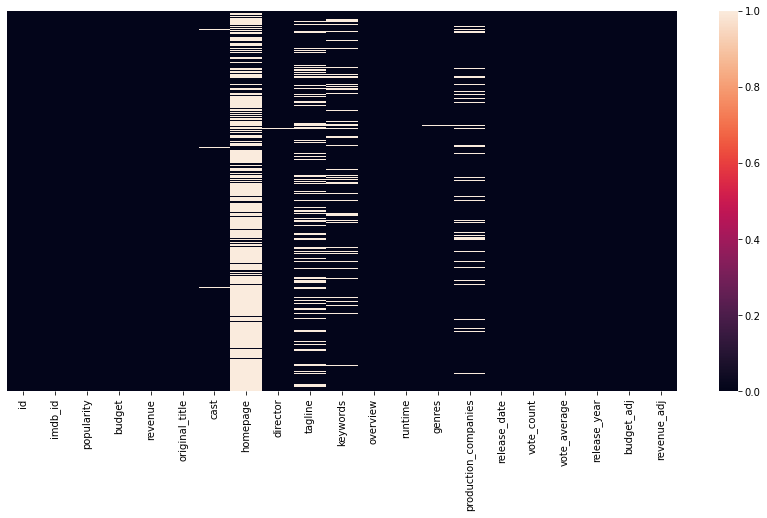

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isna());
plt.yticks([]);

In [8]:
round(df.isna().sum()/df.shape[0] *100)

id                       0.0
imdb_id                  0.0
popularity               0.0
budget                   0.0
revenue                  0.0
original_title           0.0
cast                     1.0
homepage                73.0
director                 0.0
tagline                 26.0
keywords                14.0
overview                 0.0
runtime                  0.0
genres                   0.0
production_companies     9.0
release_date             0.0
vote_count               0.0
vote_average             0.0
release_year             0.0
budget_adj               0.0
revenue_adj              0.0
dtype: float64

#### Take a look to budget and revenue values for all movies 

In [9]:
df[['budget','revenue']].describe()

,budget,revenue
count,1.086600e+04,1.086600e+04
mean,1.462570e+07,3.982332e+07
std,3.091321e+07,1.170035e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.400000e+07
max,4.250000e+08,2.781506e+09


I think there some mistakes here in this data, we should drop these movies without budget and revenue.

## Data Cleaning

#### Drop all movies without budget and revenue

In [10]:
df_with_budget_and_revenue = df[(df['revenue'] != 0.0) & (df['budget'] != 0.0)]

#### Check there are not any zero in budget or revenue.

In [11]:
df_with_budget_and_revenue[['budget', 'revenue']].describe()

,budget,revenue
count,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08
std,4.220291e+07,1.765248e+08
min,1.000000e+00,2.000000e+00
25%,1.000000e+07,1.357645e+07
50%,2.400000e+07,4.479322e+07
75%,5.000000e+07,1.241530e+08
max,4.250000e+08,2.781506e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What dose the average movie time consume ?)

In [12]:
df_with_budget_and_revenue['runtime'].describe()

count    3855.000000
mean      109.215824
std        19.922166
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

the average movie time around 2 hours to 11 

### Research Question 2 (What dose the top five genres ?)

In [13]:
movie_gen_lsts = [ lst for lst in df_with_budget_and_revenue['genres'].apply(lambda x: x.split('|'))]
gen_lst = [gen for lst in movie_gen_lsts for gen in lst]
top_five_genres = round(pd.Series(gen_lst).value_counts(normalize=True) * 100)[:5]

In [14]:
pd.DataFrame(top_five_genres, columns=['Rate'])

,Rate
Drama,17.0
Comedy,13.0
Thriller,12.0
Action,11.0
Adventure,7.0


The top five movie genres were Drama, Comedy , Thriller , Action and Adventure

In [110]:
mask = df_with_budget_and_revenue['production_companies'].isna()
prod_comp_lsts = df_with_budget_and_revenue[~mask]['production_companies'].apply(lambda x: x.split('|') if type(x) is not float else x)
prod_comp_lst = [comp for lst in prod_comp_lsts for comp in lst]
top_five_prod_comp = pd.Series(prod_comp_lst).value_counts()[:5]

In [112]:
top_five_prod_comp

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

The above list is the top five production companies.

### Research Question 3 (What are the common phrase in Taglines ?)

In [15]:
df_with_budget_and_revenue['tagline'].apply(lambda x: x if type(x) is float else len(x)).describe()

count    3575.000000
mean       43.139860
std        25.278527
min         3.000000
25%        26.000000
50%        37.000000
75%        54.000000
max       286.000000
Name: tagline, dtype: float64

In [16]:
tagline_lsts = df_with_budget_and_revenue['tagline'].apply(lambda x: x.split(' ') if type(x) is not float else x)
mask = tagline_lsts.isna()
tags_lst = [tag for lst in tagline_lsts[~mask] for tag in lst]

In [17]:
love_count = 0
story_count = 0
history_count = 0
adventure_count = 0
action_count = 0
thriller_count = 0
comedy_count = 0

for w in tags_lst:
    if 'love' in w.lower():
        love_count+=1
    elif ('story' in w.lower()) & ('h' not in w.lower()):
        story_count +=1
    elif ('history' in w.lower()):
        history_count+=1
    elif ('adventure' in w.lower()):
        adventure_count+=1
    elif ('action' in w.lower()):
        action_count+=1
    elif ('thriller' in w.lower()):
        thriller_count+=1
    elif ('comedy' in w.lower()):
        comedy_count+=1
        
common_tags = {
'love':love_count,
'story':story_count,
'history':history_count,
'adventure':adventure_count,
'action':action_count,
'thriller':thriller_count,
'comedy':comedy_count
}

pd.DataFrame(pd.Series(common_tags).sort_values(ascending=False), columns=['Frequent'])

,Frequent
love,200
story,136
adventure,81
comedy,47
history,23
action,22
thriller,2


Note: We can use NLTK to visualize the common phrase which is used in the **Tagline**.

#### Movie Release Years Distribution

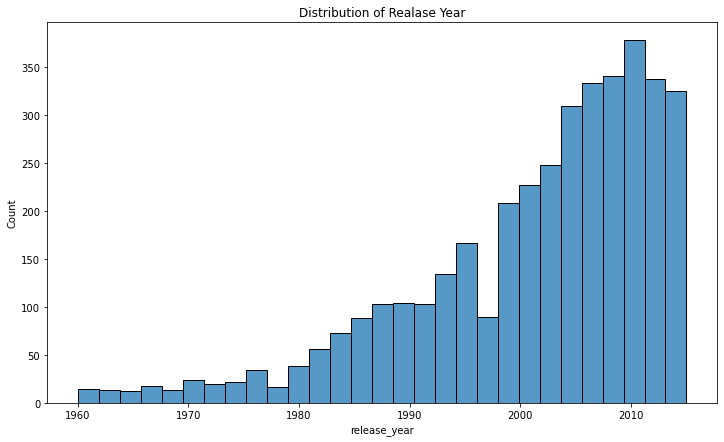

In [68]:
plt.figure(figsize=(12,7))

sns.histplot(df_with_budget_and_revenue['release_year'])

plt.title('Distribution of Realase Year', fontsize=12);

In [75]:
round(df_with_budget_and_revenue[df_with_budget_and_revenue['release_year'] >=2000].shape[0] / df_with_budget_and_revenue.shape[0] * 100)

65

We can say, around 65 % from movie released from 2000 and there is increased as incremently in the count of movie within the last years.
There is a drop between 1996 and 1997 and also in the 2015 the count drop.

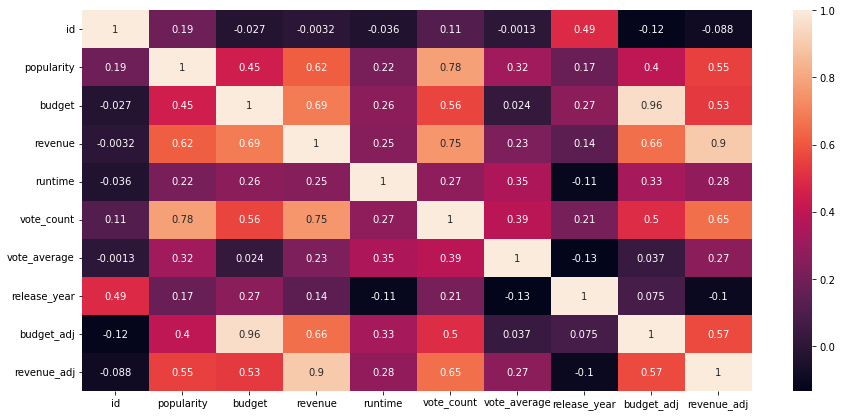

In [25]:
df_corr = df_with_budget_and_revenue.corr()

plt.figure(figsize=(15,7))
sns.heatmap(df_corr, annot=True);

We can focus on the following variables according to thier correlation between them.
- Popularity
- Budget
- Revenue
- vote_count
- release_year

#### Popularity vs vote_count

C:\Users\aalsulami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


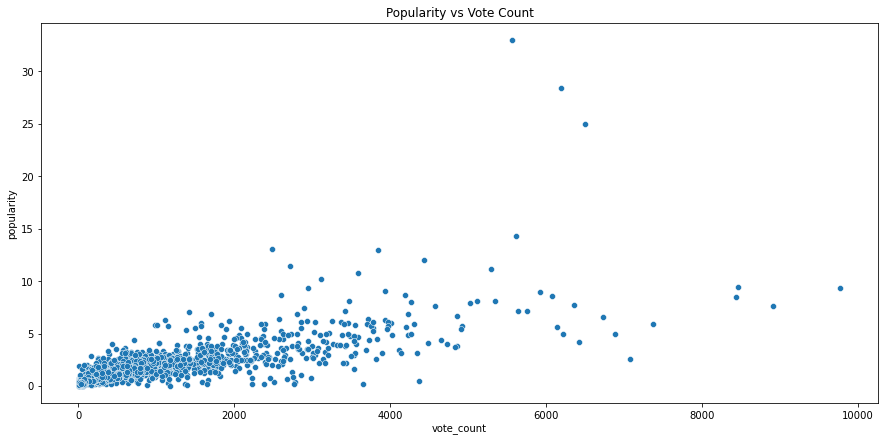

In [58]:
plt.figure(figsize=(15,7))

x = df_with_budget_and_revenue['popularity']
y = df_with_budget_and_revenue['vote_count']

sns.scatterplot(y,x)

plt.title('Popularity vs Vote Count', fontsize=12);

We can say, there is a normal positive line correlation bewtween vote_count and popularity. As well as the direction of values into the vote_count side more than popularity side and this means every increase the vote_count a little bit increase in popularity.

#### Budget vs Revenue

C:\Users\aalsulami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


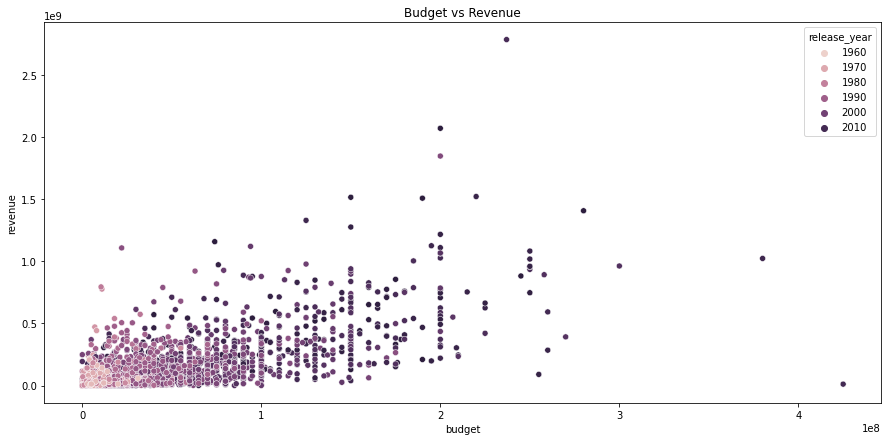

In [59]:
plt.figure(figsize=(15,7))

x = df_with_budget_and_revenue['budget']
y = df_with_budget_and_revenue['revenue']

sns.scatterplot(x,y,data=df_with_budget_and_revenue, hue='release_year')

plt.title('Budget vs Revenue', fontsize=12);

We can say, there is a positive line correlation bewtween budget and revenue. As well as the direction of values into the budget side more than revenue side and this means every increase the budget a little bit increase in revenue and the budget of movie raise with the time.

#### Revenue vs Vote Count

C:\Users\aalsulami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


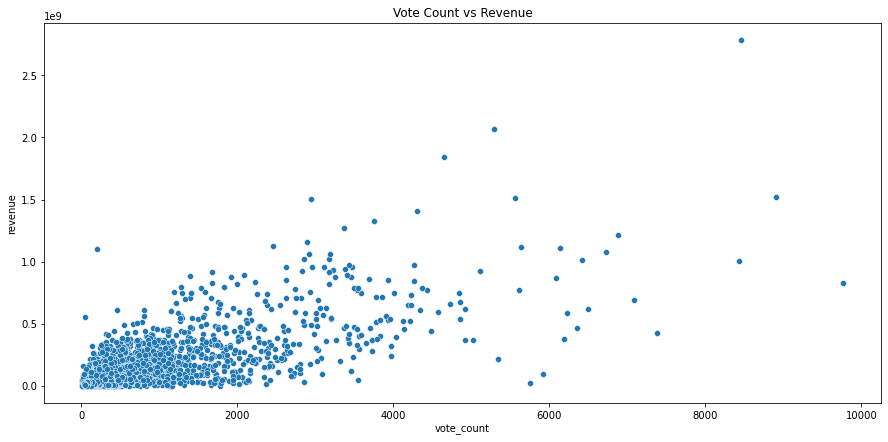

In [53]:
plt.figure(figsize=(15,7))

x = df_with_budget_and_revenue['vote_count']
y = df_with_budget_and_revenue['revenue']

sns.scatterplot(x,y)

plt.title('Vote Count vs Revenue', fontsize=12);

We can say, there is a positive line correlation bewtween reveune and vote count. As well as the direction of values into the vote count side more than revenue side and this means every increase the vote count a little bit increase in revenue.

<a id='conclusions'></a>
## Conclusions

We can summarize the entier dataset of TMDb Movie in the following points:
- The average movie time around 2 hours to 11.


- The top five movie genres were 
  1. Drama
  2. Comedy
  3. Thriller
  4. Action
  5. Adventure.
  
  
- The top five production companies were
  1. Universal Pictures
  2. Warner Bros
  3. Paramount Pictures
  4. Twentieth Century Fox Film Corporation
  5. Columbia Pictures
  
  
- There is increased as incremently in the count of movie within the last years. There is a drop between 1996 and 1997 and also in the 2015 the count drop.


- There are a positive line correlation between popularity, budget, revenue and vote count. All of the variables except vote count have increased as a little bit when the vote count increase.